<a href="https://colab.research.google.com/github/EugeneBalakhnin/GameOfLife/blob/NoDedth/GameOfLife.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random as rnd
import tensorflow as tf

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [2]:
# To generate GIFs
!pip install imageio
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-uo6fbd3p
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-uo6fbd3p
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=179891 sha256=63ed4d3fc92797ad4ffb505b97e246ddf11eacbd35bb67fb88b7268050a75a5d
  Stored in directory: /tmp/pip-ephem-wheel-cache-8yhydlc0/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs


In [3]:
#@title Подсчёт соседей в клетке

def neighborhood_array(life: list):

  def near(life: list, pos: list, system=[[-1 , -1] , [-1 , 0] , [-1 , 1] , [0 , -1] , [0 , 1] , [1 , -1] , [1 , 0] , [1 , 1]]):
    count = 0
    for i in system:
        if life[(pos[0] + i[0]) % len(life)][(pos[1] + i[1]) % len(life[0])]:
            count += 1
    return count

  neighborhood_array = []
  for i in range(len(life)):
    row = []
    for j in range(len(life)):
      row.append(near(life, [i, j]))
    neighborhood_array.append(row)
    

  return neighborhood_array

In [15]:
#@title Вывод

def output(life: list, iter: int):

  for i in range(len(life)):
    for j in range(len(life)):
      t = life[i][j]
      life[i][j] = 0 if t else 1 

  plt.imshow(life, cmap='gray')
  plt.axis('off')
  plt.title(f"{iter}")
  plt.savefig('image_at_epoch_{:04d}.png'.format(iter))
  plt.show()

  for i in range(len(life)):
    for j in range(len(life)):
      t = life[i][j]
      life[i][j] = 0 if t else 1

#Создание стартового поля

In [30]:
#@title Создания случайного расположения на поле

def life_generation(size: int): 
  life1 = []
  life2 = []

  for _ in range(size):
    life1 = []
    for _ in range(size):
      i = rnd.choice([0, 1])
      life1.append(i)
    life2.append(life1)
  return life2

In [31]:
#@title Создание не случайного располодения на поле

life = np.zeros((100, 100))
life[50][50] = 1
life[49][49] = 1
life[51][51] = 1
life[51][49] = 1
life[49][51] = 1
life[50][48] = 1
life[50][52] = 1
life[48][50] = 1
life[52][50] = 1

#Main

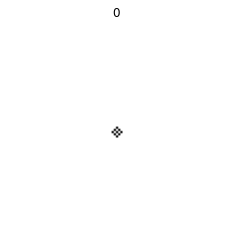

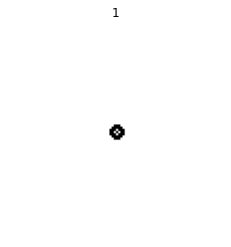

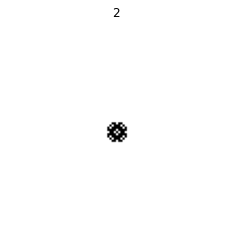

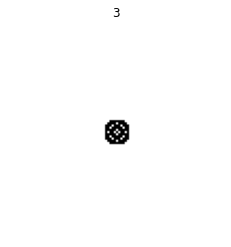

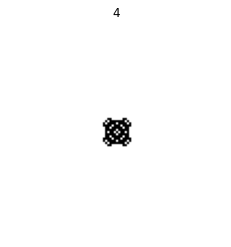

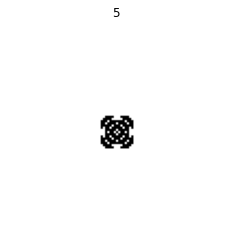

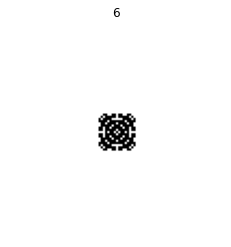

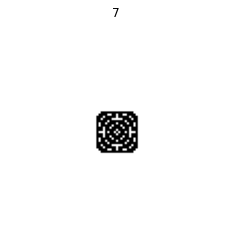

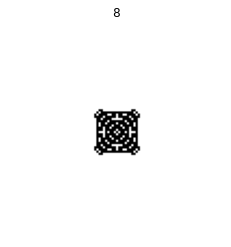

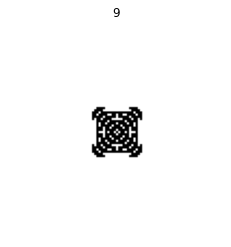

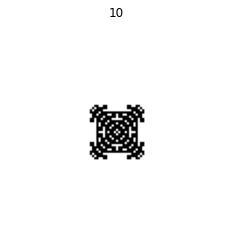

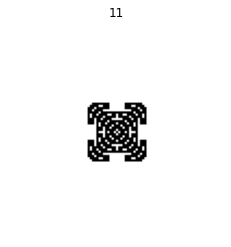

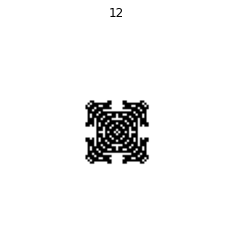

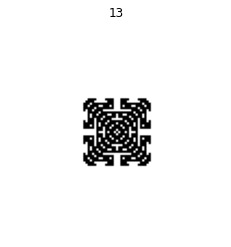

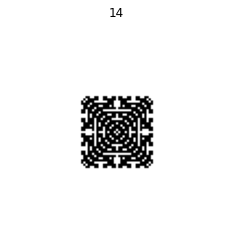

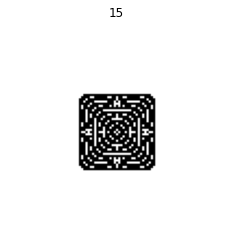

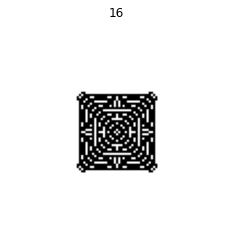

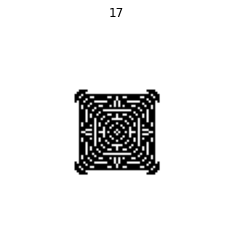

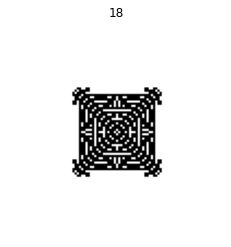

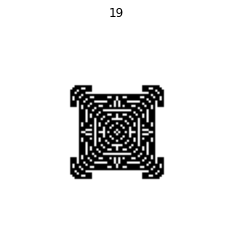

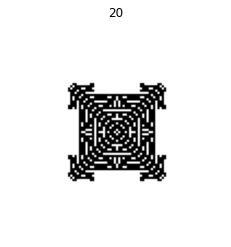

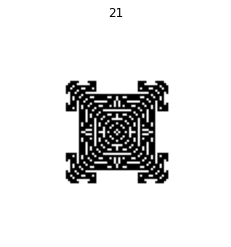

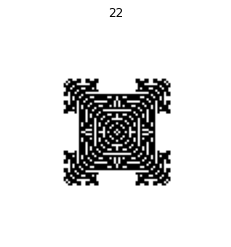

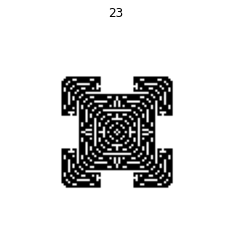

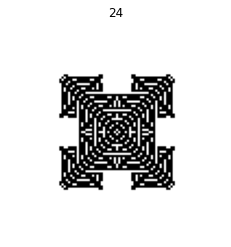

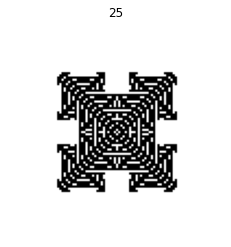

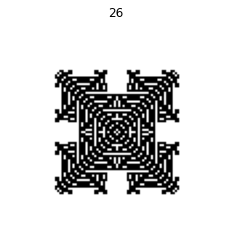

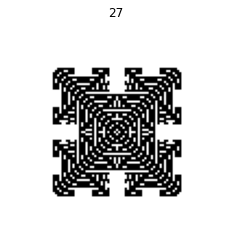

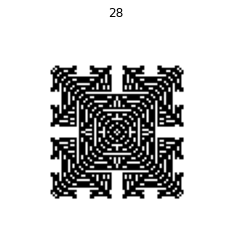

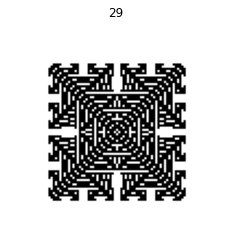

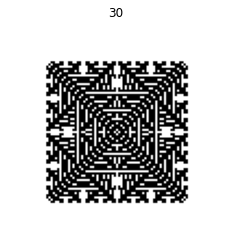

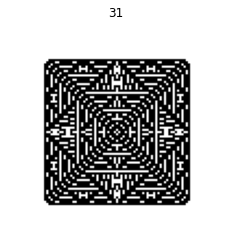

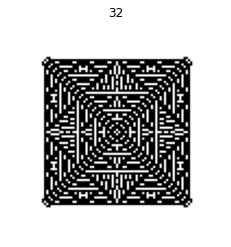

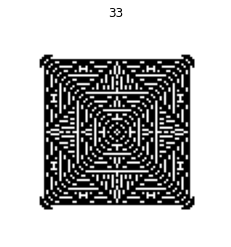

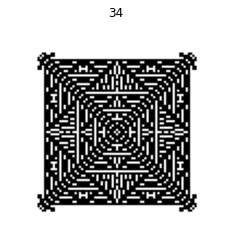

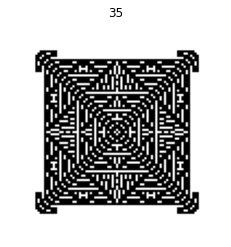

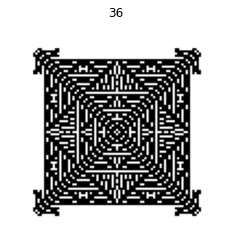

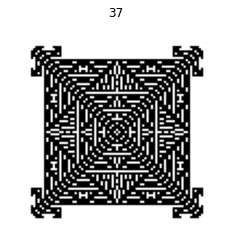

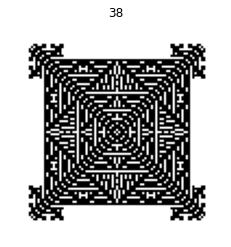

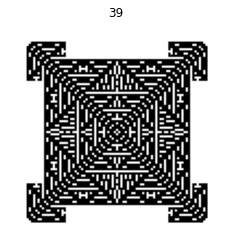

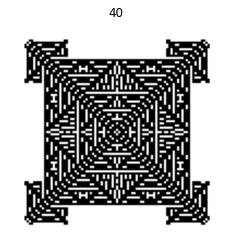

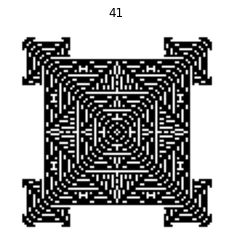

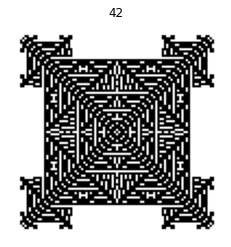

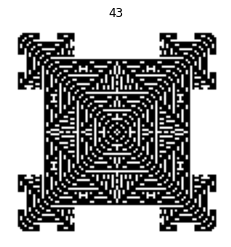

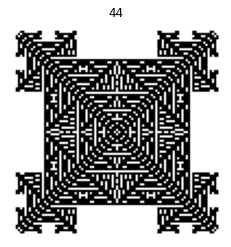

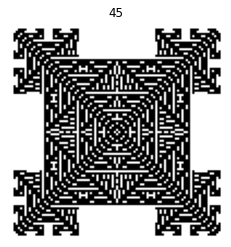

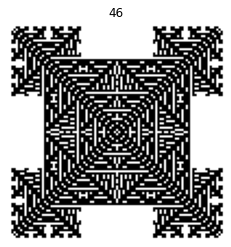

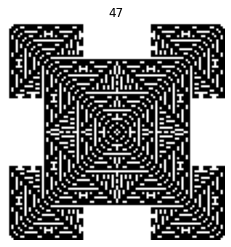

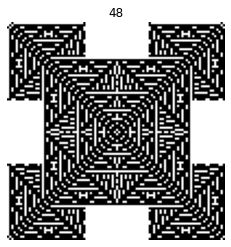

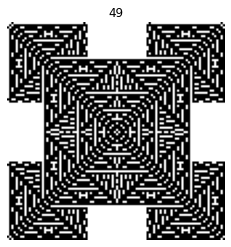

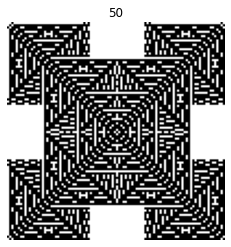

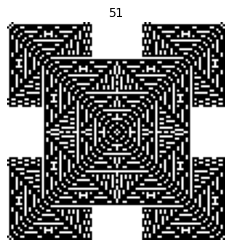

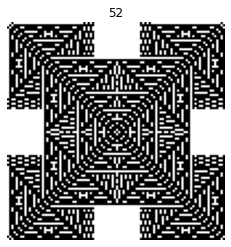

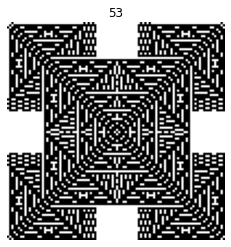

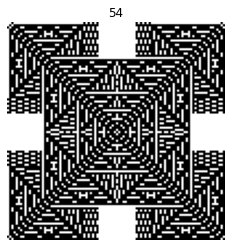

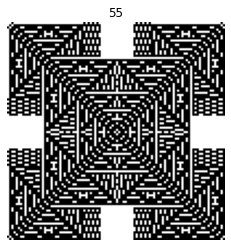

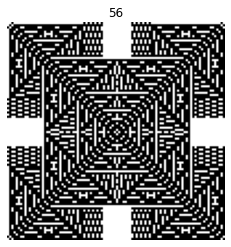

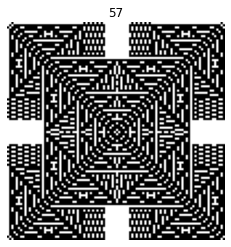

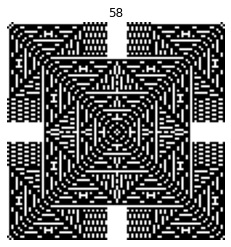

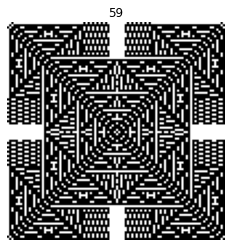

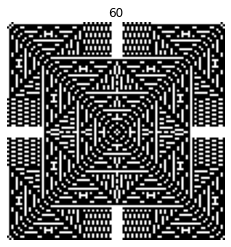

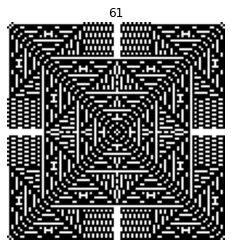

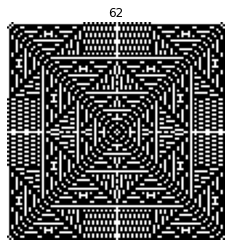

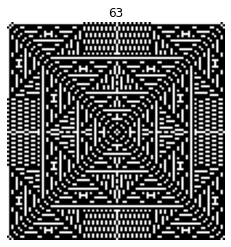

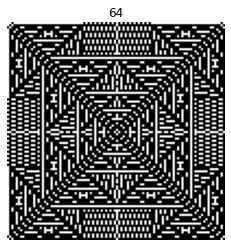

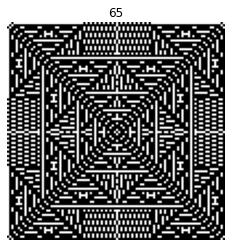

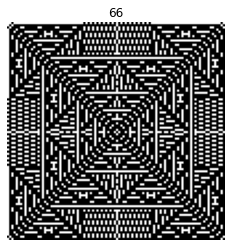

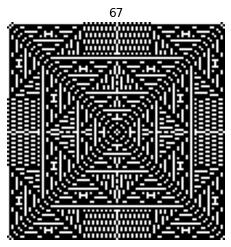

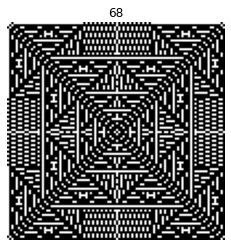

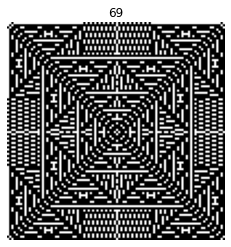

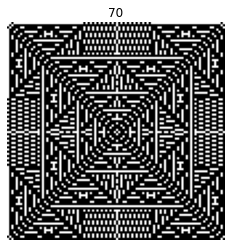

In [32]:
size = 100
epoch = 70


# life = life_generation(size)

# life = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
#         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#         [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

# life[4][4] = 1

output(life, 0)

for iter in range(epoch):

  neighbors = neighborhood_array(life)

  for i in range(size):
    for j in range(size):
      n = neighbors[i][j]
      l = life[i][j]

      if not l: 
        if n == 2 or n == 1 :
          life[i][j] = 1
        # else:
        #   life[i][j] = 0
        #   pass
    
      # if l:
      #   if n == 2 or n == 3:
      #     life[i][j] = 1
      #   else:
      #     life[i][j] = 0

  output(life, iter+1)

#Create GIF

In [33]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

In [34]:
anim_file = 'output.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)


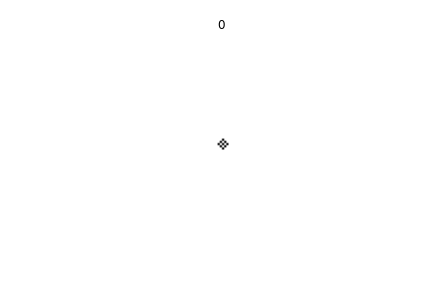

In [35]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)